# IMPORT LIBRARY

In [1]:
#IN THIS WE ARE IMPORTING LIBRARY

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,r2_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# LOAD DATA 

In [2]:
#IN THIS WE ARE IMPORTING DATA FROM DEKSTOP AND READING WITH THE HELP OF READ_CSV

df=pd.read_csv("D:\KAGGLE DATASET\DAIBETES PREDICTION AND EDA\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# DESCRIPTIVE 

In [4]:
#IN THIS WE ARE TRYING TO KNOW ABOUT DATA SH 

df.shape

(768, 9)

In [4]:
#IN THIS WE ARE TRYING TO KNOW ABOUT DATA TYPES 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# IN THIS WE ARE TRYING TO KNOW ABOUT STATISTIC OF DATA LIKE MEAN,MEDIAN ETC

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:title={'center':'COUNTPLOT'}, xlabel='Outcome', ylabel='count'>

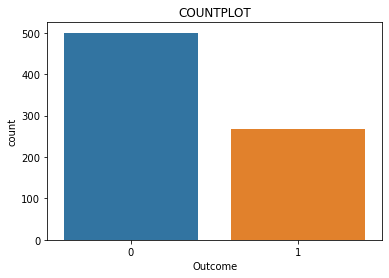

In [6]:
#IN THIS WE ARE CHECKING THE TARGET VALUE DISTRIBUTION 

plt.title('COUNTPLOT')
sns.countplot(df['Outcome'])

AS WE ARE SEEING IN THE DAIGRAM OUR DATA IS NOT BAISED

In [7]:
# FINDING THE UNIQUE VALUE OF A COLUMN 

for i in df.columns:
    print(i)
    print(df[i].unique())
    print("===================================================================================================================")
    print(end="\n")

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 6

In [8]:
#FINDING THE WIETAGE OF A COLUMN

for i in df.columns:
    print(i)
    print(df[i].value_counts(normalize=True))
    print("===================================================================================================================")
    print(end="\n")

Pregnancies
1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: Pregnancies, dtype: float64

Glucose
99     0.022135
100    0.022135
129    0.018229
125    0.018229
106    0.018229
         ...   
169    0.001302
61     0.001302
178    0.001302
177    0.001302
199    0.001302
Name: Glucose, Length: 136, dtype: float64

BloodPressure
70     0.074219
74     0.067708
78     0.058594
68     0.058594
72     0.057292
64     0.055990
80     0.052083
76     0.050781
60     0.048177
0      0.045573
62     0.044271
82     0.039062
66     0.039062
88     0.032552
84     0.029948
90     0.028646
58     0.027344
86     0.027344
50     0.016927
56     0.015625
54     0.014323
52     0.014323
92     0.010417
75     0.010417
65     0.009115
85     0.007812
94     0.007812
48     0.006510
96     0

In [9]:
# WITH THE HELP OF VALUE 

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

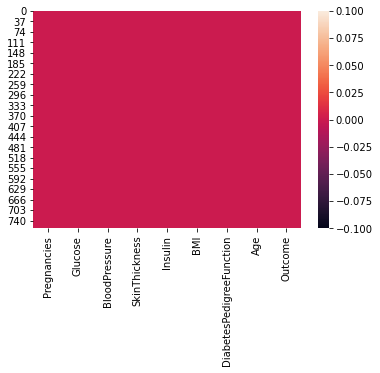

In [10]:
#IN THIS WE ARE SEEING THE NULL VALUE IN THE FORM OF DAIGRAM 

sns.heatmap(df.isnull())

THERE ARE NO NULL VALUE IN OUR DATASET

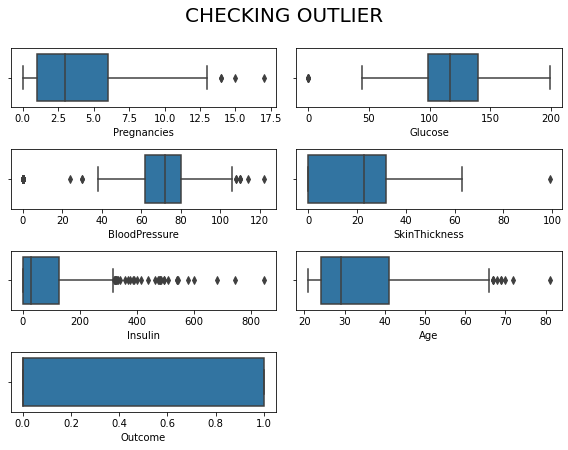

In [11]:
# IN THIS WE CHECKING THE OUTLIER OF EVERY COLUMN WITH  THE HELP OF BOXPLOT

list1=[item for item in df.columns if df[item].dtypes=='int64']
plt.figure(figsize=(8,10))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 2, i+1)
    plt.suptitle("CHECKING OUTLIER", fontsize=20, x=0.5, y=1)
    sns.boxplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN THE BOXPLOT THERE ARE ONLY FOUR COLUMNS THAT HAVE OUTLIERS THAT IS Pregnancies,BloodPressure,Insulin AND Age

# DATA ANALYSIS AND DATA VISULISATION

<AxesSubplot:>

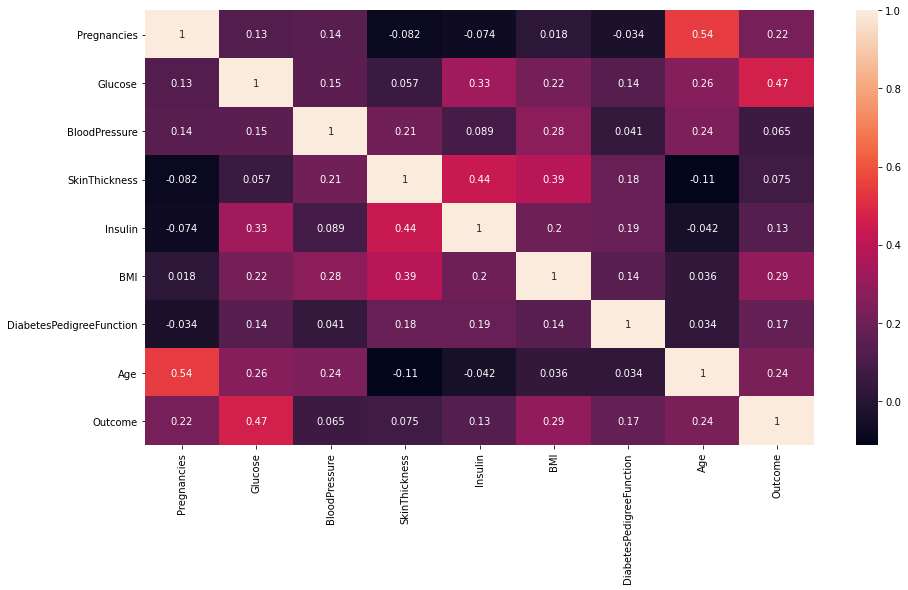

In [12]:
#IN THIS WE ARE FINDING THE CORRELATION OF COLUMN FOR FEATURE SCALING 

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

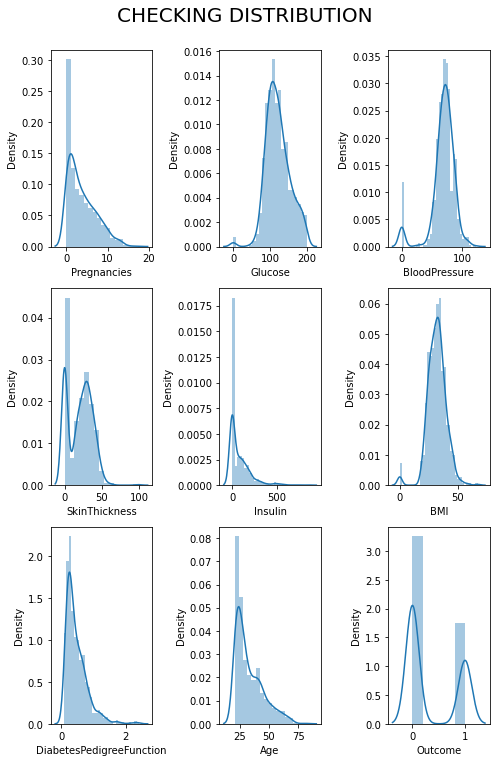

In [13]:
#IN THIS WE ARE CHECKING THAT OUR DATA IS NORMAL DISTRIBUTIVE OR NOT 

list1=list(df.columns)
plt.figure(figsize=(7,30))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 3, i+1)
    plt.suptitle("CHECKING DISTRIBUTION ", fontsize=20, x=0.5, y=1)
    sns.distplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN ABOVE DISTPLOT THERE ARE SOME NORMAL DISTRIBUTION AND SOME ARE SKEWED DATA

# FEATURE SELECTION

In [14]:
#IN THIS WE ARE DOING FEATURE SELECTION FOR TAKING IMPORTANT FEATURE FROM DATASET ON THE BASIS OF VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=df.columns
vif_data['VIF']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
5,BMI,18.515112
1,Glucose,18.030209
2,BloodPressure,15.313159
7,Age,13.500531
3,SkinThickness,4.008709
0,Pregnancies,3.364416
6,DiabetesPedigreeFunction,3.213450
4,Insulin,2.063940
8,Outcome,1.948398


AS WE ARE SEEING IN OUR ABOVE TABLE bmi AND Glucose HAVE HIGH VARIANCE

In [15]:
#IN THIS WE ARE DOING OLS MODEL FOR FEATURE SELECTION OM THE BASIS OF P VALUE  

import statsmodels.api as sm
import statsmodels.formula.api as smf
olsmodel = smf.ols(formula='Outcome~Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           7.36e-55
Time:                        05:42:04   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

IN THIS ABOVE TABLE WE CAN EASILY FIND THE IMPORTANT FEATURE WITH THE HELP OF P COLUMN

# PREPARE DATA FOR TRAINING THE MODEL 

In [16]:
#IN THIS WE ARE SEPERATING THE DATA FRAME BY DROPPING THE TARGET FEATURE 

X=df.drop('Outcome',axis=1)
Y=df['Outcome']
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


# STANDARDIZATION

In [17]:
# IH THIS SHELL WE ARE DOING FEATURE SCALING AND CONVERTING THE RANGE OF [-1,1] WITH THE HELP OF StandardScaler()

SS=StandardScaler()
SS.fit_transform(X,Y)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
from sklearn.preprocessing import MinMaxScaler
SS=MinMaxScaler()
SS.fit_transform(X,Y)

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

# DIVIDING THE DATA INTO TRAIN AND TEST

In [19]:
#IN THIS WE ARE PREPARING THE DATA INTO TWO FORM TRAIN AND TEST. TRAIN IS FOR TRAINING THE DATA TEST IS FOR TESTING THE DATA 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=31)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(537, 8)
(231, 8)
(231,)
(537,)


In [20]:
# IN THIS WE ARE USING RANDOM FOREST CLASSIFIER 

Logreg = LogisticRegression()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

TP: 125 
TN: 22 
FP: 28 
FN: 56
Presicion Score is:  0.717948717948718
Recall score is: 0.6666666666666666
Accuaracy Score is: 0.7835497835497836


# CROSS CHECKING THE ACCURACY THAT WHY OUR ACCURACY IS LOW BY USING GRIDSEARCHCV

In [21]:
#FINDING THE PROBABLITY OF OUTCOME
y_para=Logreg.predict_proba(X_test)

In [22]:
y_para

array([[0.97817451, 0.02182549],
       [0.81357052, 0.18642948],
       [0.88498124, 0.11501876],
       [0.89053935, 0.10946065],
       [0.20475009, 0.79524991],
       [0.53260151, 0.46739849],
       [0.96626599, 0.03373401],
       [0.60991687, 0.39008313],
       [0.73724167, 0.26275833],
       [0.93754643, 0.06245357],
       [0.79183655, 0.20816345],
       [0.20181149, 0.79818851],
       [0.76260155, 0.23739845],
       [0.84357927, 0.15642073],
       [0.64614045, 0.35385955],
       [0.59335937, 0.40664063],
       [0.89042048, 0.10957952],
       [0.99790868, 0.00209132],
       [0.32888558, 0.67111442],
       [0.93427588, 0.06572412],
       [0.67073509, 0.32926491],
       [0.32608977, 0.67391023],
       [0.22214454, 0.77785546],
       [0.95106008, 0.04893992],
       [0.90444506, 0.09555494],
       [0.75025909, 0.24974091],
       [0.33580873, 0.66419127],
       [0.07008703, 0.92991297],
       [0.40555705, 0.59444295],
       [0.22022214, 0.77977786],
       [0.

In [23]:
# PERFORMING GRIDSEARCHCV

import numpy as np
logreg=LogisticRegression()
param_grid  = {'penalty' : ['l1','l2','elasticnet'],
               'C': np.logspace(-4,4,20),
              'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100,1000,2000,2500]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)
Base_clf = clf.fit(X,Y)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


In [24]:
# FINDING THE BEST ESTIMATOR

Base_clf.best_estimator_

LogisticRegression(C=29.763514416313132)

In [25]:
Logreg = LogisticRegression(C=29.76)
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7662337662337663

In [26]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)
y_pred_proba = reg.predict_proba(X_test)
y_pred_proba = reg.predict_proba(X_test)[:,1]
for i in range(3,10):
    cutoff = i/10
    correct = 0
    for i in range(y_pred_proba.shape[0]):
        pred =0
        if y_pred_proba[i] > cutoff:
            pred =1
        actual = Y_test.values[i]
        if pred == actual:
            correct +=1
    print(cutoff,correct/y_pred_proba.shape[0])

0.3 0.7359307359307359
0.4 0.7705627705627706
0.5 0.7835497835497836
0.6 0.7619047619047619
0.7 0.7316017316017316
0.8 0.6883116883116883
0.9 0.6493506493506493


AS WE ARE SEEING THE BEST ACCURACY IS 78% AND BEST CUTOFF VALUE IS 0.5 AT LAST WE CAN GET HIGHEST ACCURACY IS 78%

In [27]:
# FOR NORMALIZATION WE ARE USING MINMAXSCALER

from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM.fit_transform(X_train,Y_train)

array([[0.52941176, 0.7839196 , 0.70491803, ..., 0.51117735, 0.53823673,
        0.41176471],
       [0.17647059, 0.48241206, 0.45901639, ..., 0.3681073 , 0.41889917,
        0.35294118],
       [0.23529412, 0.92462312, 0.63934426, ..., 0.5514158 , 0.08767657,
        0.19607843],
       ...,
       [0.        , 0.59296482, 0.68852459, ..., 0.68256334, 0.22747199,
        0.19607843],
       [0.05882353, 0.54773869, 0.31147541, ..., 0.3442623 , 0.15733074,
        0.09803922],
       [0.05882353, 0.74874372, 0.55737705, ..., 0.4366617 , 0.1290794 ,
        0.41176471]])

In [28]:
Logreg = XGBClassifier()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

[05:43:26] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TP: 117 
TN: 30 
FP: 27 
FN: 57
Presicion Score is:  0.6551724137931034
Recall score is: 0.6785714285714286
Accuaracy Score is: 0.7532467532467533


 AFTER PERFORMING NORMALIZATION OUR ACCURACY DECREASING 

# SAVING THE MODEL

In [29]:
import pickle
pickle.dump(Logreg, open('daibetes.pickle', 'wb'))
daibetes_model = pickle.load(open('daibetes.pickle', 'rb'))

# CONCLUSION


IN THIS WE ARE PERFORMING MANY OPERATION AND AFTER DOING DATA PREPROCESSING WE ARE MAKING 3 ML MODEL AND AFTER COMPARING THEIR ACCURACY OF 3 MODEL WE CAN GET RANDOMFORESTCLASSIFIER HAVE HIGH ACCURACY